## Aula 04 - Avaliação de Sistemas de Recomendação - Exercícios

In [1]:
import pandas as pd
import numpy as np

### Importar base de dados

In [2]:
!pip install wget
!python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz
!tar -xvzf ml-20m-compact.tar.gz

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=ec95305c56387919cba067b06e912c035fc7b127a47cf080b16bb0125c29c7b3
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget

Saved under ml-20m-compact.tar.gz
dataset/
dataset/tags_sample.csv
dataset/._.DS_Store
dataset/.DS_Store
dataset/movies_sample.csv
dataset/._genome-tags.csv
dataset/genome-tags.csv
dataset/._ml-youtube.csv
dataset/ml-youtube.csv
dataset/._genome-scores.csv
dataset/genome-scores.csv
dataset/ratings_sample.csv


In [3]:
movies = pd.read_csv('./dataset/movies_sample.csv')
ratings = pd.read_csv('./dataset/ratings_sample.csv')
df = ratings[['userId', 'movieId', 'rating']]
df = df.merge(movies[['movieId', 'title']])
df

,userId,movieId,rating,title
0,11,7481,5.0,Enemy Mine (1985)
1,359,7481,4.0,Enemy Mine (1985)
2,422,7481,3.0,Enemy Mine (1985)
3,424,7481,3.0,Enemy Mine (1985)
4,744,7481,3.0,Enemy Mine (1985)
...,...,...,...,...
190616,131651,118606,3.5,Dots (1940)
190617,134567,118606,3.5,Dots (1940)
190618,131651,96257,1.0,Heroic Purgatory (Rengoku eroica) (1970)
190619,131651,98337,4.0,97 Percent True (2008)


In [4]:
movies_genres = movies.drop('genres', axis=1).join(movies.genres.str.split('|', expand=True)
             .stack().reset_index(drop=True, level=1).rename('genre'))
movies_genres.head()

,movieId,title,genre
0,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime
0,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Drama
1,31,Dangerous Minds (1995),Drama
2,37,Across the Sea of Time (1995),Documentary
2,37,Across the Sea of Time (1995),IMAX


In [5]:
movies_tags = pd.read_csv('./dataset/tags_sample.csv')
movies_tags.head()

,userId,movieId,tag,timestamp_y
0,279,916,Gregory Peck,1329962459
1,279,916,need to own,1329962471
2,279,916,romantic comedy,1329962476
3,279,916,Rome,1329962490
4,279,916,royalty,1329962474


In [6]:
map_users = {user: idx for idx, user in enumerate(df.userId.unique())}
map_items = {item: idx for idx, item in enumerate(df.movieId.unique())}

df['userId'] = df['userId'].map(map_users)
df['movieId'] = df['movieId'].map(map_items)

movies_tags['userId'] = movies_tags['userId'].map(map_users)
movies_tags['movieId'] = movies_tags['movieId'].map(map_items)
movies_tags.dropna(inplace=True)
movies_tags['movieId'] = movies_tags.movieId.astype(int)
movies_tags['userId'] = movies_tags.userId.astype(int)

movies_genres['movieId'] = movies_genres['movieId'].map(map_items)
movies_genres.dropna(inplace=True)
movies_genres['movieId'] = movies_genres.movieId.astype(int)

map_title = {}
for _, row in df.iterrows():
    map_title[row.movieId] = row.title


In [7]:
movies_genres[['movieId', 'genre']].to_csv('items_genres.dat', index=False, sep='\t', header=False)
movies_tags[['movieId', 'tag']].to_csv('items_tags.dat', index=False, sep='\t', header=False)

### Divisão da base em treino e teste

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=2)
train.to_csv('train.dat', index=False, header=False, sep='\t')
test.to_csv('test.dat', index=False, header=False, sep='\t')

### Exemplos de utilização do CaseRecommender

In [10]:
# install caserec
import sys
!{sys.executable} -m pip install caserecommender

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.1 MB/s eta 0:00:00


In [11]:
from caserec.recommenders.rating_prediction.item_attribute_knn import ItemAttributeKNN

ItemAttributeKNN('train.dat', 'test.dat', metadata_file='items_genres.dat', k_neighbors=10, as_similar_first=True).compute()
ItemAttributeKNN('train.dat', 'test.dat', metadata_file='items_tags.dat', k_neighbors=10, as_similar_first=True).compute()

[Case Recommender: Rating Prediction > Item Attribute KNN Algorithm]

train data:: 11090 users and 403 items (152496 interactions) | sparsity:: 96.59%
test data:: 10503 users and 340 items (38125 interactions) | sparsity:: 98.93%

training_time:: 13.874494 sec
>> metadata:: 417 items and 20 metadata (890 interactions) | sparsity:: 89.33%
prediction_time:: 0.688679 sec
Eval:: MAE: 0.736439 RMSE: 0.966548 
[Case Recommender: Rating Prediction > Item Attribute KNN Algorithm]

train data:: 11090 users and 403 items (152496 interactions) | sparsity:: 96.59%
test data:: 10503 users and 340 items (38125 interactions) | sparsity:: 98.93%

training_time:: 7.685050 sec
>> metadata:: 231 items and 1979 metadata (6274 interactions) | sparsity:: 98.63%
prediction_time:: 0.742549 sec
Eval:: MAE: 0.762727 RMSE: 1.008645 


***Exercício 01:*** Verifique o efeito no RSME ao aumentar o número de vizinhos do algoritmo ItemAttributeKNN com usando gêneros. Explique.

In [ ]:
for k in [5, 10, 15, 20, 25]:
    print(f"Running ItemAttributeKNN with k_neighbors = {k}")
    ItemAttributeKNN('train.dat', 'test.dat', metadata_file='items_genres.dat', k_neighbors=k, as_similar_first=True).compute()

Running ItemAttributeKNN with k_neighbors = 5
Running ItemAttributeKNN with k_neighbors = 10
Running ItemAttributeKNN with k_neighbors = 15
Running ItemAttributeKNN with k_neighbors = 20
Running ItemAttributeKNN with k_neighbors = 25


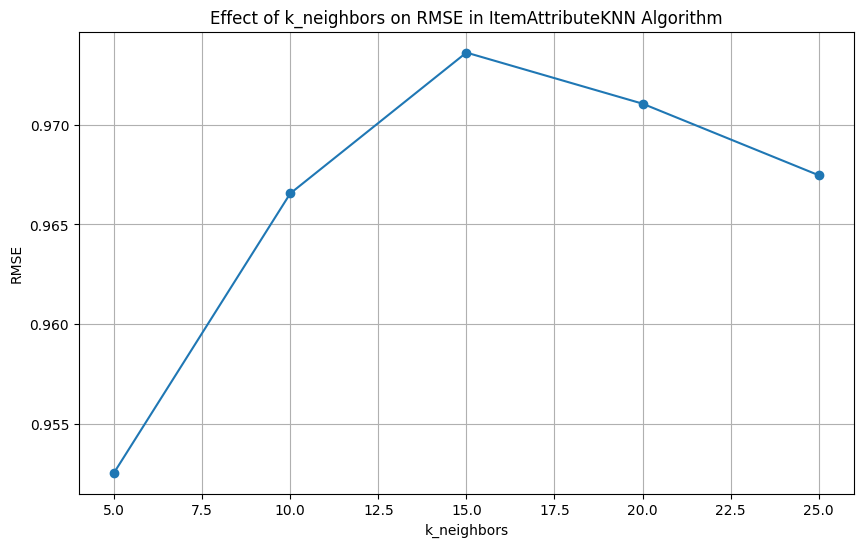

In [36]:
import matplotlib.pyplot as plt
import io
from contextlib import redirect_stdout

rmse_values = []
k_values = [5, 10, 15, 20, 25]

for k in k_values:
    print(f"Running ItemAttributeKNN with k_neighbors = {k}")

    buffer = io.StringIO()  # Create an io.StringIO object to capture output
    with redirect_stdout(buffer):  # Redirect stdout to the buffer
        ItemAttributeKNN('train.dat', 'test.dat', metadata_file='items_genres.dat', k_neighbors=k, as_similar_first=True).compute()

    output = buffer.getvalue()  # Retrieve the output as a string
    for line in output.split('\n'):  # Search for the RMSE line
        if 'RMSE' in line:
            rmse = float(line.split()[-1])  # Assuming the RMSE value is the last item in the line
            rmse_values.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o')
plt.title("Effect of k_neighbors on RMSE in ItemAttributeKNN Algorithm")
plt.xlabel("k_neighbors")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

***Exercício 02:*** Verifique o efeito na métrica MAP@1 ao aumentar o número de fatores do algoritmo BPRMF. Explique.

In [21]:
from caserec.recommenders.item_recommendation.bprmf import BprMF

for factors in [1, 3, 5, 10]:
    print(f"Running BprMF with factors = {factors}")
    BprMF('train.dat', 'test.dat', factors=factors).compute()

# A métrica MAP@1 diminui conforme se aumenta o número de fatores. Isso ocorre porque essa métrica considera apenas o primeiro item mais recomendado,
# enquanto que aumentar o número de fatores é bom para se encontrar um padrão de um grupo de boas recomendações, e não especificamente a primeira recomendação ser a melhor.

Running BprMF with factors = 1
[Case Recommender: Item Recommendation > BPRMF]

train data:: 11090 users and 403 items (152496 interactions) | sparsity:: 96.59%
test data:: 10503 users and 340 items (38125 interactions) | sparsity:: 98.93%

training_time:: 166.290167 sec
prediction_time:: 2.681837 sec


Eval:: PREC@1: 0.387318 PREC@3: 0.270812 PREC@5: 0.226031 PREC@10: 0.172941 RECALL@1: 0.122551 RECALL@3: 0.24458 RECALL@5: 0.333411 RECALL@10: 0.499664 MAP@1: 0.387318 MAP@3: 0.470842 MAP@5: 0.474954 MAP@10: 0.449795 NDCG@1: 0.387318 NDCG@3: 0.551193 NDCG@5: 0.569984 NDCG@10: 0.571101 
Running BprMF with factors = 3
[Case Recommender: Item Recommendation > BPRMF]

train data:: 11090 users and 403 items (152496 interactions) | sparsity:: 96.59%
test data:: 10503 users and 340 items (38125 interactions) | sparsity:: 98.93%

training_time:: 151.983844 sec
prediction_time:: 2.716456 sec


Eval:: PREC@1: 0.379606 PREC@3: 0.276968 PREC@5: 0.233514 PREC@10: 0.177902 RECALL@1: 0.11993 RECALL@3:

Running BprMF with factors = 1
Running BprMF with factors = 3
Running BprMF with factors = 5
Running BprMF with factors = 10


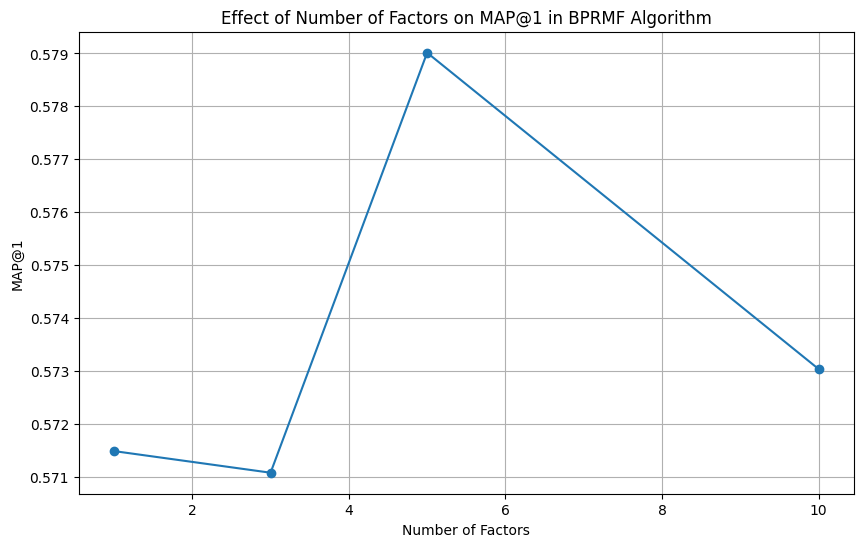

In [37]:
factor_values = [1, 3, 5, 10]
map_values = []

for factors in factor_values:
    print(f"Running BprMF with factors = {factors}")

    buffer = io.StringIO()  # Create an io.StringIO object to capture output
    with redirect_stdout(buffer):  # Redirect stdout to the buffer
        BprMF('train.dat', 'test.dat', factors=factors).compute()

    output = buffer.getvalue()  # Retrieve the output as a string
    for line in output.split('\n'):  # Search for the MAP@1 line
        if 'MAP@1' in line:
            map_at_1 = float(line.split()[-1])  # Assuming the MAP@1 value is the last item in the line
            map_values.append(map_at_1)

plt.figure(figsize=(10, 6))
plt.plot(factor_values, map_values, marker='o')
plt.title("Effect of Number of Factors on MAP@1 in BPRMF Algorithm")
plt.xlabel("Number of Factors")
plt.ylabel("MAP@1")
plt.grid(True)
plt.show()

***Exercício 03:*** Implemente a métrica Average Precision para um único usuário. Utilize as recomendações geradas pelo algoritmo BPRMF (consulte notebook Aula04_Exemplo como base).

In [38]:
def average_precision(preds, ground_truth):
    hits = 0
    sum_precs = 0
    for i, p in enumerate(preds):
        if p in ground_truth:
            hits += 1
            sum_precs += hits / (i + 1)
    return sum_precs / len(ground_truth) if ground_truth else 0

# Example
print(average_precision([1, 2, 4], [1, 2, 3]))


0.6666666666666666


***Exercício 04:*** Um importante aspecto que pode ser avaliado em Sistemas de Recomendação é a diversidade da lista de recomendações. A métrica Intra-List Similarity (ILS) aplica uma função de similaridade (e.g. Cosseno, Jaccard, Pearson, etc.) entre todos os pares de itens da lista de recomendação, usando seus metadados como gêneros, tags, etc. Mais detalhes sobre essa métrica podem ser encontrados em: https://grouplens.org/site-content/uploads/Improving-WWW-20051.pdf

***a)*** Implemente uma função que calcula a ILS de uma lista de recomendação para um único usuário. Utilize os gêneros de filmes.

In [39]:
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity

def ils_for_user(recommended_movie_ids, items_genres):
    pairs = list(combinations(recommended_movie_ids, 2))
    if not pairs:
        return 0

    similarity_sum = 0
    for movie1, movie2 in pairs:
        genres1 = items_genres.loc[items_genres['movieId'] == movie1, 'genre'].tolist()
        genres2 = items_genres.loc[items_genres['movieId'] == movie2, 'genre'].tolist()

        # Create genre vectors for cosine similarity
        all_genres = list(set(genres1 + genres2))
        vec1 = [1 if genre in genres1 else 0 for genre in all_genres]
        vec2 = [1 if genre in genres2 else 0 for genre in all_genres]

        similarity = cosine_similarity([vec1], [vec2])[0][0]
        similarity_sum += similarity

    avg_similarity = similarity_sum / len(pairs)
    return avg_similarity


***b)*** Utilize a função que implementou no item (a) para calcular a ILS de todos os usuários da base de dados. Utilize as recomendações geradas pelo algoritmo BPR MF do CaseRecommender.

In [40]:
def ils_for_all_users(recommendations, items_genres):
    ils_values = []
    for user, recs in recommendations.items():
        ils = ils_for_user(recs, items_genres)
        ils_values.append(ils)

    if len(ils_values) == 0:
        return 0

    return sum(ils_values) / len(ils_values)


***c)*** Aplique a função que implementou no item (b) para calcular a ILS das recomendações geradas pelos algoritmos ItemKNN e ItemAttributeKNN. Compare os resultados de todos os algoritmos, verificando inclusive o que acontece com a acurácia (precisão, MAP ou NDCG) quando a diversidade aumenta ou diminui.


In [41]:
# Generate recommendations using ItemKNN, and ItemAttributeKNN, then populate these dictionaries
recommendations_itemknn = {0: [1, 4, 3], 1: [4, 5, 1], 2: [1, 3, 5]}
recommendations_itemattrknn = {0: [2, 4, 1], 1: [3, 2, 5], 2: [4, 1, 2]}


# Calculate the average ILS for each algorithm's recommendations
average_ils_itemknn = ils_for_all_users(recommendations_itemknn, movies_genres)
average_ils_itemattrknn = ils_for_all_users(recommendations_itemattrknn, movies_genres)

# Print the results
print(f"Average ILS for ItemKNN: {average_ils_itemknn}")
print(f"Average ILS for ItemAttributeKNN: {average_ils_itemattrknn}")

Average ILS for ItemKNN: 0.027777777777777776
Average ILS for ItemAttributeKNN: 0.027777777777777776
